# Car Insurance Claim Prediction

In [32]:
import numpy as np
import pandas as pd
import seaborn as sb
import seaborn as sns
import matplotlib.pyplot as plt
sb.set()

In [33]:
o_data = pd.read_csv('train.csv')
o_data.head()

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
3,ID00004,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
4,ID00005,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,...,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0


In [34]:
print("Data Dims: ", o_data.shape)

Data Dims:  (58592, 44)


In [35]:
print(o_data.dtypes)

policy_id                            object
policy_tenure                       float64
age_of_car                          float64
age_of_policyholder                 float64
area_cluster                         object
population_density                    int64
make                                  int64
segment                              object
model                                object
fuel_type                            object
max_torque                           object
max_power                            object
engine_type                          object
airbags                               int64
is_esc                               object
is_adjustable_steering               object
is_tpms                              object
is_parking_sensors                   object
is_parking_camera                    object
rear_brakes_type                     object
displacement                          int64
cylinder                              int64
transmission_type               

In [36]:
#Check for presence of null values in the dataset
print("Number of null values in each column: ")
print(o_data.isnull().sum())

Number of null values in each column: 
policy_id                           0
policy_tenure                       0
age_of_car                          0
age_of_policyholder                 0
area_cluster                        0
population_density                  0
make                                0
segment                             0
model                               0
fuel_type                           0
max_torque                          0
max_power                           0
engine_type                         0
airbags                             0
is_esc                              0
is_adjustable_steering              0
is_tpms                             0
is_parking_sensors                  0
is_parking_camera                   0
rear_brakes_type                    0
displacement                        0
cylinder                            0
transmission_type                   0
gear_box                            0
steering_type                       0
turning_rad

Since there are no null values within the dataset, there are no columns that need to be removed due to invalid data.

In [37]:
#Check for duplicate rows 
print("Number of rows that are duplicates: ")
print(o_data.duplicated().sum())

Number of rows that are duplicates: 
0


Since the number of duplicates = 0, we can conclude that each set of data within the dataset is unique.

In [38]:
#Finding the ratio of claims vs no claims
class_freq = o_data['is_claim'].value_counts()
print(class_freq)

is_claim
0    54844
1     3748
Name: count, dtype: int64


In [39]:
class_ratio = class_freq[0]/class_freq[1]
print("Ratio of Class 0 to Class 1: {:.2f}".format(class_ratio))

Ratio of Class 0 to Class 1: 14.63


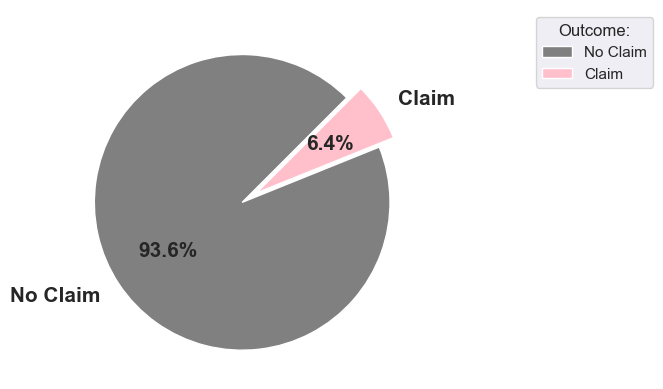

In [40]:
fig = plt.figure(facecolor ='white')
ax = fig.add_subplot(1,1,1, facecolor = 'white')
plt.pie((class_freq), labels=['No Claim', 'Claim'], radius = 1, colors = ['gray', 'pink'], autopct = '%1.1f%%', explode = [0.1, 0.015], labeldistance = 1.15, startangle = 45, textprops={'fontsize':15, 'fontweight': 'bold'})
plt.legend(title='Outcome:', loc='upper right', bbox_to_anchor=(1.6,1))
fig.patch.set_facecolor('white')
plt.show()

Due to the large class imbalance in the response variable 'is_claim', we need to fix this to prevent further problems for classification models. 

In [41]:
no_claim = o_data.drop(o_data[o_data['is_claim']==1].index)
claim = o_data.drop(o_data[o_data['is_claim']==0].index)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 60 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   area_cluster_C1              58592 non-null  float64
 1   area_cluster_C10             58592 non-null  float64
 2   area_cluster_C11             58592 non-null  float64
 3   area_cluster_C12             58592 non-null  float64
 4   area_cluster_C13             58592 non-null  float64
 5   area_cluster_C14             58592 non-null  float64
 6   area_cluster_C15             58592 non-null  float64
 7   area_cluster_C16             58592 non-null  float64
 8   area_cluster_C17             58592 non-null  float64
 9   area_cluster_C18             58592 non-null  float64
 10  area_cluster_C19             58592 non-null  float64
 11  area_cluster_C2              58592 non-null  float64
 12  area_cluster_C20             58592 non-null  float64
 13  area_cluster_C21

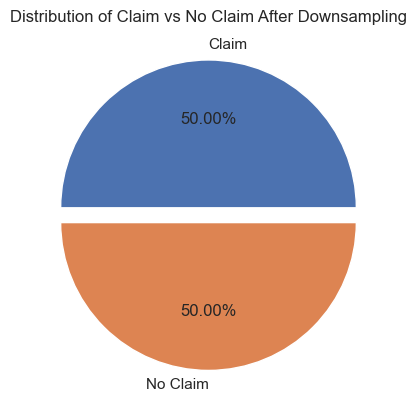

In [49]:

from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()

cat_features = o_data[['area_cluster', 'segment', 'model', 'fuel_type', 'max_torque', 'max_power']]

num_data = o_data[['age_of_car', 'age_of_policyholder', 'policy_tenure', 'is_claim']]

# OneHotEncoding of categorical predictors (not the response)
ohe.fit(cat_features)
cat_features_ohe = pd.DataFrame(ohe.transform(cat_features).toarray(),
                                columns=ohe.get_feature_names_out(cat_features.columns))

# Check the encoded variables
cat_features_ohe.info()
total_features_ohe = pd.concat([num_data, cat_features_ohe],
                               sort = False, axis = 1).reindex(index=num_data.index)

from sklearn.utils import resample

claim = total_features_ohe[total_features_ohe['is_claim'] == 1]
nclaim = total_features_ohe[total_features_ohe['is_claim'] == 0]

# Downsample the majority class (no claim)
nclaim_downsampled = resample(nclaim,
                              replace=False,    # Sample without replacement
                              n_samples=len(claim),  # Match minority class size
                              random_state=1)   # Reproducible results

# Combine minority class (claim) with downsampled majority class (no claim)
final_train = pd.concat([claim, nclaim_downsampled])

# Plot the downsampled data
plt.pie(final_train['is_claim'].value_counts(), labels=['Claim', 'No Claim'],
        autopct='%1.2f%%', explode=[0.05] * 2)
plt.title("Distribution of Claim vs No Claim After Downsampling")
plt.show()

Train Data
Accuracy  :	 0.644076840981857

TPR Train :	 0.7533807829181495
TNR Train :	 0.534850640113798

FPR Train :	 0.465149359886202
FNR Train :	 0.24661921708185053


<Axes: >

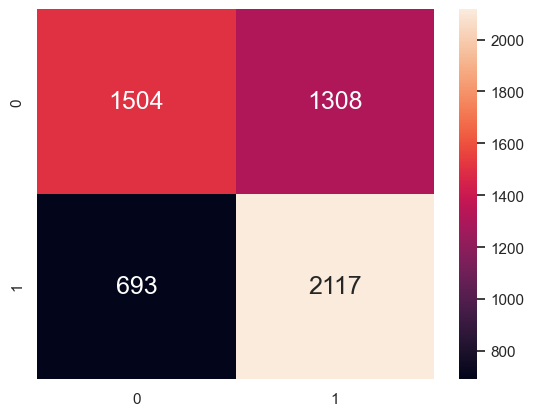

In [50]:
from sklearn.ensemble import RandomForestClassifier

rforest = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=0)

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

y = final_train['is_claim']
x = final_train.drop('is_claim', axis=1)
# Split the Dataset into Train and Test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

rforest.fit(x_train, y_train)
# Predict the Response corresponding to Predictors
y_train_pred = rforest.predict(x_train)

# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", rforest.score(x_train, y_train))
print()

from sklearn.metrics import confusion_matrix
# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1]  # True Positives : Good (1) predicted Good (1)
fpTrain = cmTrain[0][1]  # False Positives : Bad (0) predicted Good (1)
tnTrain = cmTrain[0][0]  # True Negatives : Bad (0) predicted Bad (0)
fnTrain = cmTrain[1][0]  # False Negatives : Good (1) predicted Bad (0)

print("TPR Train :\t", (tpTrain / (tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain / (tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain / (tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain / (tpTrain + fnTrain)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot=True, fmt=".0f", annot_kws={"size": 18})


TPR Train :	 0.7533807829181495
TNR Train :	 0.534850640113798

FPR Train :	 0.465149359886202
FNR Train :	 0.24661921708185053
Test Accuracy  :	 0.6067235859124867


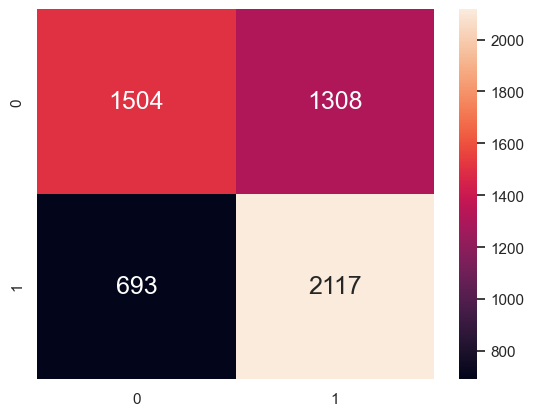

In [51]:
#Next, we want to find the optimal hyperparamaters for n_estimators, max_depth and max_features for our Random Forest model to improve accuracy of our model. To do this, we use GridSearchCV to iterate through different hyperparameter configurations to find the ideal set of hyperparameters
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
#Define the hyperparamter grid 
p_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'max_features': ['sqrt', 'log2']
}

rf = RandomForestClassifier(random_state = 0)
#Create Guided Search across the hyperparameter grid through 5 cross validation folds 
g_search = GridSearchCV(estimator=rf, param_grid=p_grid,cv= 5)
#Fit the Guided Search on Training Data 
g_search.fit(x_train, y_train)
best_param = g_search.best_params_
best_rf = g_search.best_estimator_

y_test_pred = best_rf.predict(x_test)

from sklearn.metrics import confusion_matrix
# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1]  # True Positives : Good (1) predicted Good (1)
fpTrain = cmTrain[0][1]  # False Positives : Bad (0) predicted Good (1)
tnTrain = cmTrain[0][0]  # True Negatives : Bad (0) predicted Bad (0)
fnTrain = cmTrain[1][0]  # False Negatives : Good (1) predicted Bad (0)

print("TPR Train :\t", (tpTrain / (tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain / (tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain / (tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain / (tpTrain + fnTrain)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot=True, fmt=".0f", annot_kws={"size": 18})

# Print the Classification Accuracy
print("Test Accuracy  :\t", accuracy_score(y_test_pred, y_test))
print()



In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


log = LogisticRegression(max_iter = 2000, random_state = 0)
log.fit(x_train, y_train)


log_test_pred = log.predict(x_test)
log_acc_test = accuracy_score(log_test_pred, y_test)
print("Test Accuracy:",log_acc_test)

Test Accuracy: 0.5740646196484575


In [46]:
from sklearn.naive_bayes import GaussianNB

#Build a Gaussian Naive Bayes Classifier 
nb = GaussianNB()
nb.fit(x_train,y_train)

nb_test_pred = nb.predict(x_test)
nb_acc_test = accuracy_score(log_test_pred, y_test)
print("Test Accuracy:",nb_acc_test)

Test Accuracy: 0.5740646196484575


In [47]:
#Creation of Voting Classifier 
from sklearn.ensemble import VotingClassifier
from sklearn import model_selection
#Using the three classifiers we have created of RandomForest, Logistic Regression and Naive Bayes as ensemble of Classifiers
clf1 = log
clf2 = best_rf
clf3 = nb
# Create a list of labels
labels = ['Logistic Regression', 'Random Forest', 'Naive Bayes',
          'Voting_Classifier_Hard', 'Voting_Classifier_Soft']
# Create a Hard Voting Classifier
voting_clf_hard = VotingClassifier(
    estimators=[
        (labels[0], clf1),  # Include the first classifier (Logistic Regression)
        (labels[1], clf2),  # Include the second classifier (Random Forest)
        (labels[2], clf3),  # Include the third classifier (Naive Bayes)
    ],
    voting='hard'  # Specify hard voting, where the majority class prediction is chosen
)

# Create a Soft Voting Classifier
voting_clf_soft = VotingClassifier(
    estimators=[
        (labels[0], clf1),  # Include the first classifier (Logistic Regression)
        (labels[1], clf2),  # Include the second classifier (Random Forest)
        (labels[2], clf3),  # Include the third classifier (Naive Bayes)
    ],
    voting='soft'  # Specify soft voting, where class probabilities are combined
)


# Loop through the classifiers and perform 5-fold cross-validation for each
for clf, label in zip([clf1, clf2, clf3, voting_clf_hard, voting_clf_soft], labels):
    clf.fit(x_train,y_train)
    y_test_pred = clf.predict(x_test)
    print("Accuracy: %0.2f [%s]" % (accuracy_score(y_test, y_test_pred), label))

Accuracy: 0.57 [Logistic Regression]
Accuracy: 0.62 [Random Forest]
Accuracy: 0.53 [Naive Bayes]
Accuracy: 0.60 [Voting_Classifier_Hard]
Accuracy: 0.55 [Voting_Classifier_Soft]
